In [1]:
#Evalucion 2
#!pip install geopandas
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

<Axes: >

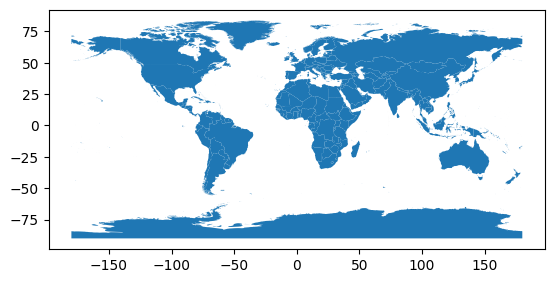

In [2]:
#!pip install matplotlib
countries.plot()

In [3]:
#Let's open the other maps:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

<Axes: >

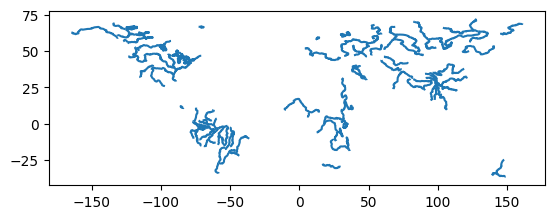

In [4]:
# visualizing rivers
rivers.plot()

<Axes: >

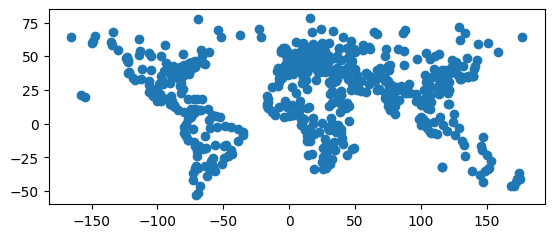

In [5]:
# visualizing cities
cities.plot()

In [6]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
rivers.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
# changing crs in cities and rivers to be the same as countries

cities=cities.to_crs(countries.crs)
rivers=rivers.to_crs(countries.crs)

In [10]:
#Keep the maps for one country
romania=countries[countries.COUNTRY=='Romania']

<Axes: >

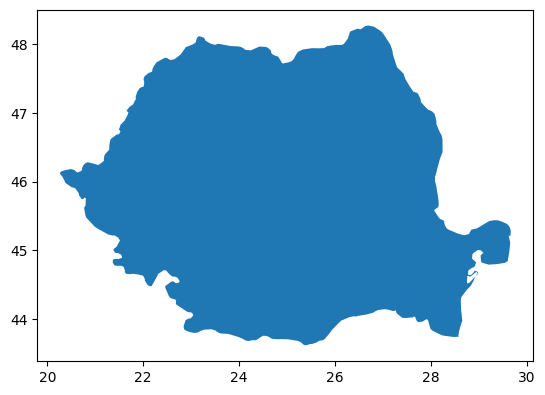

In [11]:
romania.plot()

In [12]:
#Details on the cities
cities.head()

,NAME,COUNTRY,CAPITAL,geometry
0,Murmansk,Russia,N,POINT (33.08604 68.96355)
1,Arkhangelsk,Russia,N,POINT (40.64616 64.52067)
2,Saint Petersburg,Russia,N,POINT (30.45333 59.95189)
3,Magadan,Russia,N,POINT (150.78001 59.57100)
4,Perm',Russia,N,POINT (56.23246 58.00024)


<Axes: >

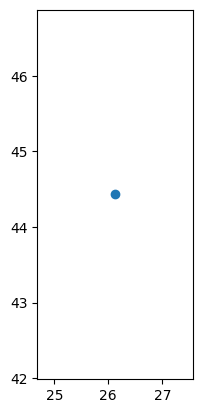

In [13]:
cities_romania=cities[cities.COUNTRY=='Romania']
cities_romania.plot()

In [25]:
#See the rivers
rivers.head()

,NAME,SYSTEM,geometry
0,Aldan,Lena,"LINESTRING (124.00678 56.47258, 123.25956 56.6..."
1,Amazon,Amazon,"MULTILINESTRING ((-61.27730 -3.60706, -60.6846..."
2,Amu Darya,None,"LINESTRING (73.98818 37.49952, 73.52595 37.528..."
3,Amur,None,"LINESTRING (122.63956 49.99730, 120.47874 49.2..."
4,Angara,None,"LINESTRING (105.07841 51.93053, 103.92959 51.7..."


<Axes: >

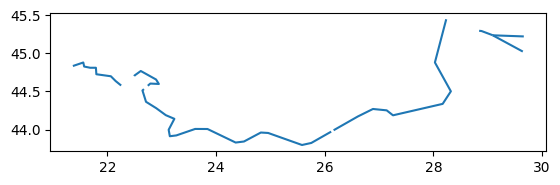

In [14]:
rivers_romania = gpd.clip(gdf=rivers,
                               mask=romania)
rivers_romania.plot()

<Axes: >

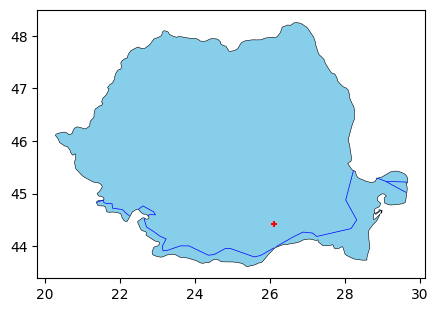

In [27]:
#Plot the clipped version
base = romania.plot(facecolor="skyblue", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_romania.plot(marker='+', color='red', markersize=15,ax=base)
rivers_romania.plot(edgecolor='blue', linewidth=0.5,ax=base)

In [16]:
romaniaCoord=[45.943161, 24.96676]

In [17]:
m = cities_romania.explore(location=romaniaCoord,
                   zoom_start=4,
                   tiles='CartoDB positron',
                   color='red',
                   name="cities") #optional
m = rivers_romania.explore(m=m, color="blue",
                   name="rivers")
m

In [28]:
# unit is in degrees:
romania.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [29]:
# centroid
#This operation warn you on this issue
romania.centroid

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13220\1050024670.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  romania.centroid


185    POINT (24.96926 45.84361)
dtype: geometry

In [38]:
#I used a link, where you can find a crs per country
# recommended for Romania (meters)
romania.to_crs(31600).crs.axis_info


[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [39]:
# this works with no warning
romania.to_crs(31600).centroid


185    POINT (468008.482 493718.196)
dtype: geometry

<Axes: >

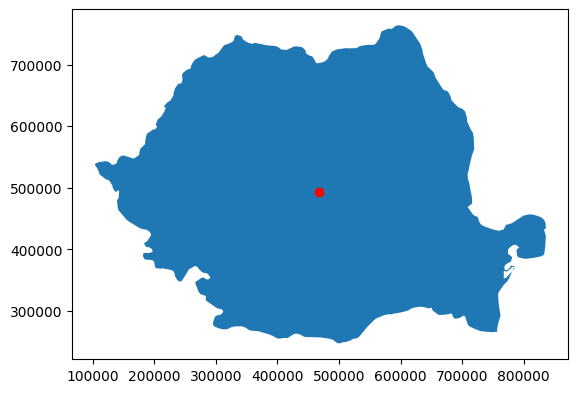

In [40]:
# replotting:

base31600=romania.to_crs(31600).plot()
romania.to_crs(31600).centroid.plot(color='red',ax=base31600)


In [33]:
romania_31600=romania.to_crs(31600)
# just romania

cities_romania=cities[cities.COUNTRY=='Romania']
cities_31600=cities_romania.to_crs(romania_31600.crs)

rivers_31600=rivers.to_crs(romania_31600.crs)
rivers_31600=gpd.clip(gdf=rivers_31600,mask=romania_31600)

<Axes: >

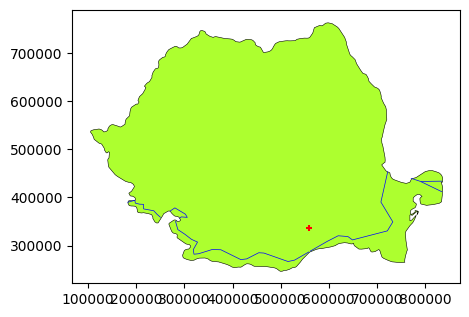

In [42]:
base = romania_31600.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_31600.plot(marker='+', color='red', markersize=15,ax=base)
rivers_31600.plot(edgecolor='blue', linewidth=0.5,ax=base)

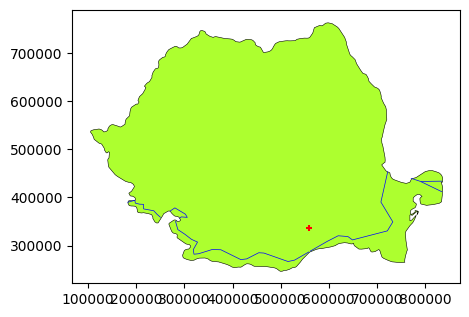

In [44]:
#Exporting maps
# save the map as image
import matplotlib.pyplot as plt

base = romania_31600.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
map2=cities_31600.plot(marker='+', color='red', markersize=15,ax=base)
mapEnd=rivers_31600.plot(edgecolor='blue', linewidth=0.5,ax=base)
plt.savefig(os.path.join("figures",'mapEnd.jpg'))

In [45]:
countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")

In [18]:
usa=countries[countries.COUNTRY=='United States']

<Axes: >

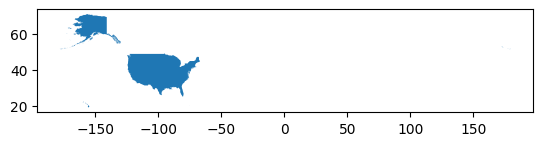

In [19]:
usa.plot()

<Axes: >

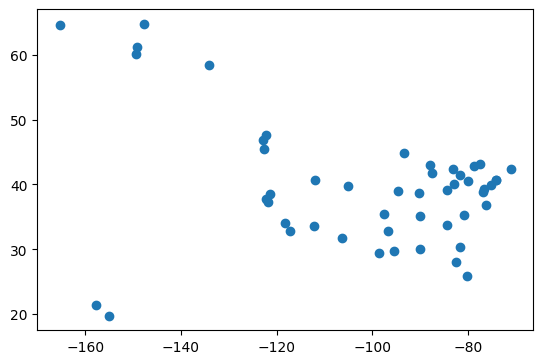

In [20]:
cities_usa=cities[cities.COUNTRY=='US']

cities_usa.plot()

<Axes: >

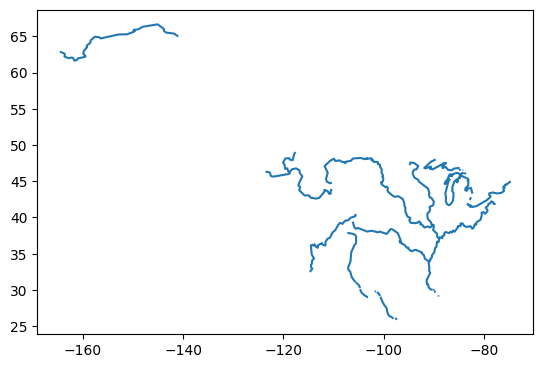

In [21]:
rivers_usa = gpd.clip(gdf=rivers,
                               mask=usa)

# you have:

rivers_usa.plot()

<Axes: >

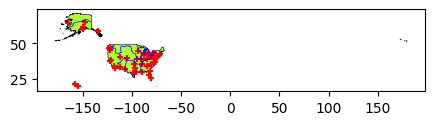

In [22]:
base = usa.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_usa.plot(marker='+', color='red', markersize=15,ax=base)
rivers_usa.plot(edgecolor='blue', linewidth=0.5,ax=base)

In [23]:
usaCoord=[37.09024, -95.712891]

In [24]:
m = cities_usa.explore(location=usaCoord,
                   zoom_start=4,
                   tiles='CartoDB positron',
                   color='red',
                   name="cities") #optional
m = rivers_usa.explore(m=m, color="blue",
                   name="rivers")#optional

m